## Installing and exploring the names.txt

In [1]:
!pip install torch

In [2]:
!pip install numpy
!pip install matplotlib

In [3]:
import torch
print(torch.__version__)

2.0.1+cu117


In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
len(words)

32084

In [7]:
min(len(w) for w in words)

2

In [8]:
max(len(w) for w in words)

15

In [9]:
len(words)

32084

## Making Models


### 1. Bi-gram model : taking two char --  given single char predicting next single char in the sequence

In [10]:
words[:2]

['emma', 'olivia']

In [11]:
for w in words[:2]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a
o l
l i
i v
v i
i a


But this does not capture the info that e or o comes at the start of the name  OR a comes at the end of a name. 
We need to **account this info** in our modeling or bigrams through `START` and `END` tokens

In [12]:
for w in words[:2]:
    chs = ['START'] + list(w) + ['END']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

START e
e m
m m
m a
a END
START o
o l
l i
i v
v i
i a
a END


#### Simple way to model **which chars are more likely to come next which chars** we can simple create a dictionary and keep count of occurence of every bigram in our dataset

In [13]:
# Creating the dictionary for the whole dataset
bigram_dict = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        bigram_dict[bigram] = bigram_dict.get(bigram, 0) + 1

#bigram_dict

#### Now we have statistics of the whole data

In [14]:
#bigram_dict.items()

In [15]:
sorted(bigram_dict.items(), key = lambda kv : kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

#### Most likely bigrams that occur in our training data

In [16]:
#sorted(bigram_dict.items(), key = lambda kv : -kv[1])

#### Need to create this dictionary to a tensor or matrix using `Pytorch`

In [17]:
import torch

In [18]:
M = torch.zeros((28, 28), dtype=torch.int32)
M

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [19]:
#words

In [20]:
''.join(words)

'emmaoliviaavaisabellasophiacharlottemiaameliaharperevelynabigailemilyelizabethmilaellaaverysofiacamilaariascarlettvictoriamadisonlunagracechloepenelopelaylarileyzoeynoralilyeleanorhannahlillianaddisonaubreyelliestellanataliezoeleahhazelvioletaurorasavannahaudreybrooklynbellaclaireskylarlucypaisleyeverlyannacarolinenovagenesisemiliakennedysamanthamayaankitayyoobsahilwillowkinsleynaomiaaliyahelenasaraharianaallisongabriellaalicemadelyncorarubyevakritikreetikaaditirahulserenityautumnadelinehaileygiannavalentinaislaelianajayeshsnehamokshasatendrapragyanpranavquinnnevaehivysadiepiperlydiaalexajosephineemeryjuliadelilahariannaviviankayleesophiebriellemadelinepeytonryleeclarahadleymelaniemackenziereaganadalynnlilianaaubreejademehulmohitshazebkulsumsauravshagunsaanjhnikhilnishitkarmkatherineisabellenataliaraelynnmariaathenaximenaaryaleilanitaylorfaithrosekyliealexandramarymargaretlylaashleyamayaelizabriannabaileyandreakhloejasminemelodyirisisabelnorahannabellevaleriaemersonadalynryleighedenem

In [21]:
len(set(''.join(words)))

26

#### creating a lookup table for mapping my characters a-z

In [22]:
chars = sorted(list(set(''.join(words))))
string_to_integer = {s:i for i,s in enumerate(chars)}
string_to_integer['<S>'] = 26
string_to_integer['<E>'] = 27

In [23]:
string_to_integer


{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

#### Updating my matrix [28 x 28]

In [24]:
for w in words:
    chs = ['<S>'] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = string_to_integer[ch1]
        idx2 = string_to_integer[ch2]
        M[idx1, idx2] += 1

In [25]:
M

tensor([[ 557,  542,  470, 1044,  692,  134,  171, 2334, 1650,  177,  571, 2528,
         1635, 5447,   63,   82,   61, 3268, 1120,  689,  382,  837,  161,  182,
         2052,  436,    0, 6650],
        [ 321,   39,    1,   65,  655,    0,    0,   42,  218,    1,    0,  103,
            0,    4,  107,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           84,    0,    0,  116],
        [ 815,    0,   42,    1,  551,    0,    2,  666,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1287,    5,   25,  119,  676,    9,    3,   60,
           30,   31,  378,    0,    1,  428,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  122,  153,  384, 1275,   82,  125,  155,  818,   55,  179, 3248,
          769, 2680,  269,   83,   14, 1962,  864,  582,   69,  463,   50,  132,
         1070,  181,    0, 3984],
        [ 242,    0,

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --upgrade numpy

#### Visualising my M matrix of bigram counts

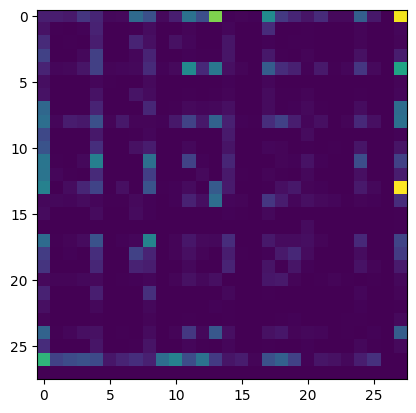

In [27]:
plt.imshow(M)

In [28]:
integer_to_string = {i:s for s, i in string_to_integer.items()}

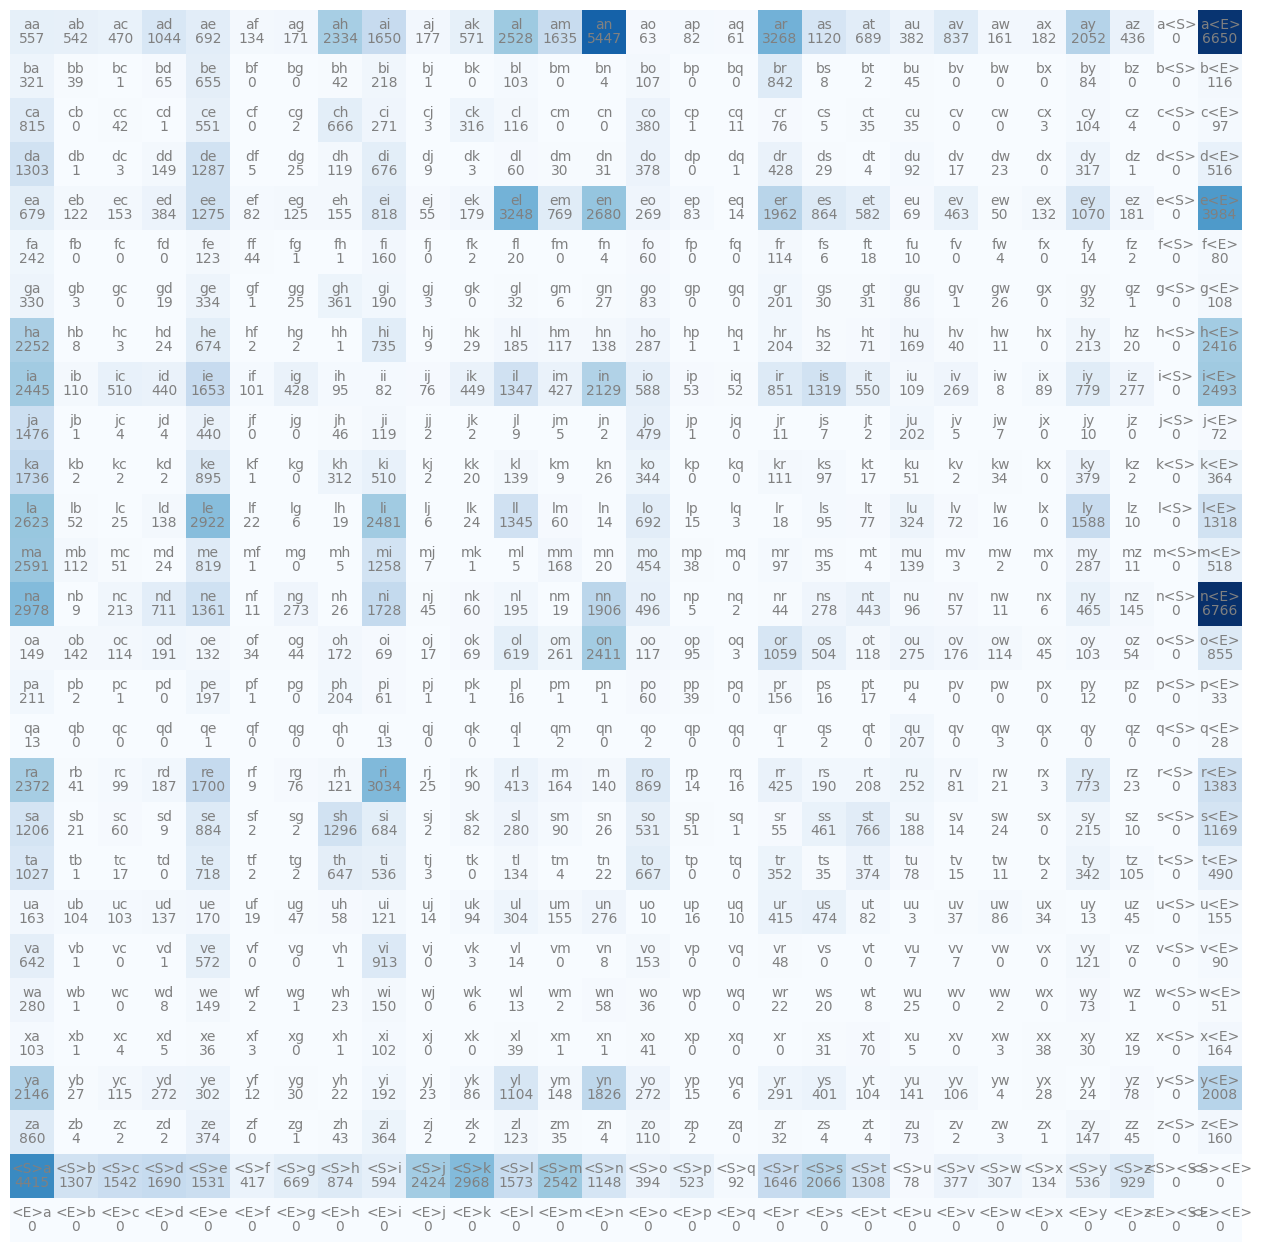

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(M, cmap ='Blues')
for i in range(28):
    for j in range(28):
        chstr = integer_to_string[i] + integer_to_string[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, s = M[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');
        

#### Last row and second last col are redundant. Wasting space. Therefore need to remove these array col somehow

### Changing the matrix M again

In [30]:
import torch
M = torch.zeros((27,27), dtype = torch.int32)

In [31]:
chars = sorted(list(set(''.join(words))))
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # Special char has position 
itos = {i:s for s, i in stoi.items()}

In [32]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [33]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        M[idx1, idx2] += 1

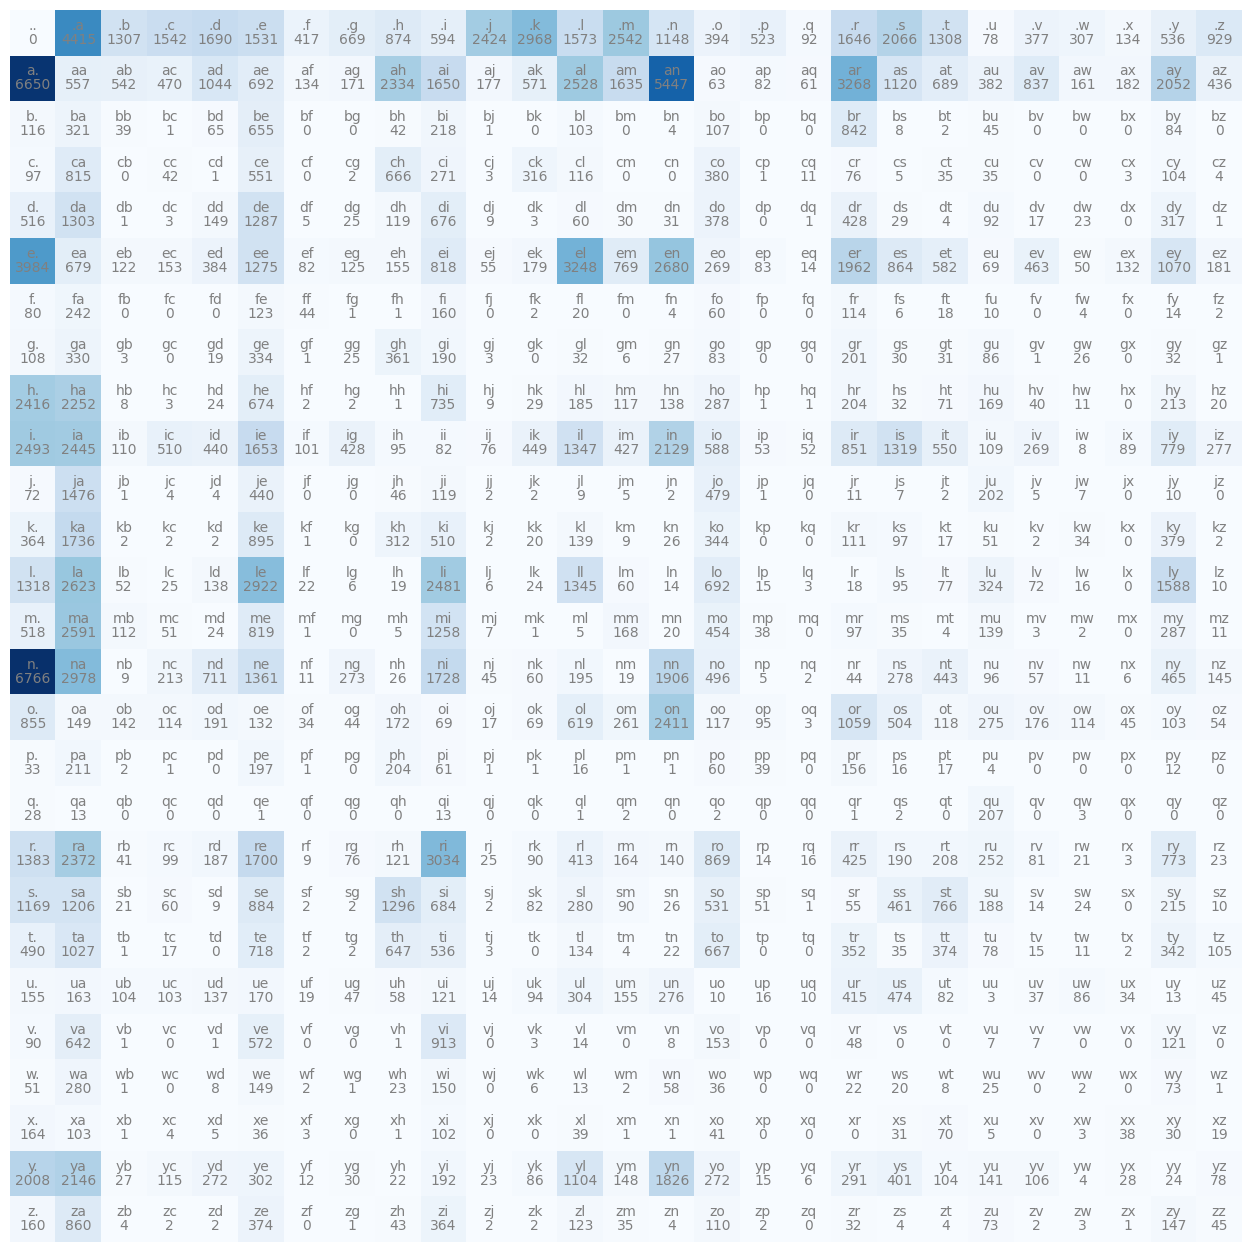

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(M, cmap ='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, s = M[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');
        

### Sampling from the model

In [35]:
import numpy as np
p = M[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1376, 0.0407, 0.0481, 0.0527, 0.0477, 0.0130, 0.0209, 0.0272,
        0.0185, 0.0756, 0.0925, 0.0490, 0.0792, 0.0358, 0.0123, 0.0163, 0.0029,
        0.0513, 0.0644, 0.0408, 0.0024, 0.0118, 0.0096, 0.0042, 0.0167, 0.0290])

In [36]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()
itos[ix]

'j'

In [37]:
p.shape

torch.Size([27])

### Completely untrained model. --> Sampling from the Uniform Distribution.

In [38]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
    out = []
    ix = 0
    while True:
        #p = M[ix].float()
        #p = p/ p.sum()
        p = torch.ones(27)/ 27.0
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.
ndxjxfpvslqtikyzsaloevgvvnundewkfmbjzqegruxiteaxchwtmurzsodridcdznojvaliypvrghvxtezrwguciqqvywhqelv.
viosvhibdhnceukgmtmwboscnbzoiwupnwnpipixtewbgsgyewfdacbfcxrvjypkmsbranmjrdsydotafvkdkbdepihzpwzsqdab.
vfuolwbasrtugttbiqbujfdtskceqjtcdlcndfujqllsppgkltalmlokdmsl.
fddmxjv.
mfsgxmw.
vdihkvngtojvrdsyqivcob.
uziengogtjvnvqgfjtkqufrxfjlwglykiiluohgnoiuwzylq.
fsgircvmhtipagkxwvjypnsriadmfujnlkcicvatjvryzeljxkbrlrjsp.
puybxzhwuejbiotzqpxrkbhhhgsivfjblaklxoivwqjpdkucftazqgwslvrvqcqmbadayrgufbalqdoumwytowbzqzrvbddvlhqn.
kvhztsmltmpcxnikfn.
inzastwohtcyonakisemrtfxwwlsxihficdlxfkdxjljagkjmeifigffkmcnjylullxfvyyb.
dphbhmwcqseutozswzhksu.
zqnzkadicmoufzbwmpqqfdmtxdxuuvkeikbtviyxvtjxhmlslti

### Bigram Model Results

In [39]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
    out = []
    ix = 0
    while True:
        p = M[ix].float()
        p = p/ p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


#### These samples of names generated are very very bad. The bigram model performs very bad

In [40]:
P = (M+1).float()  # 1 added to every entry to make sure there is not a inf loss for any test word
P.shape # Please see below for loss prediction for our word 'ayyoobq'

torch.Size([27, 27])

In [41]:
#P.sum(1, keepdim = True)
P.sum(1, keepdim = True).shape


torch.Size([27, 1])

In [42]:
P = P/P.sum(1, keepdim = True)
P[0].sum()

tensor(1.)

In [43]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
    out = []
    ix = 0
    while True:
        #p = M[ix].float()
        #p = p/ p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


### Evaluationg the quality of our model through loss
* Goal is to **maximise the Likelihood** (product of all the probabilities) w.r.t model parameters
* equal to maximising the log-likelihood
* equal to minimising the negative of log likelihood 
* equal to average minimising the negative of log likelihood  -- **`LOSS`**

In [44]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f"{ch1}{ch2} --> prob : {prob:.4f}, log prob : {logprob:.4f}")
    
print(f"Log Likelihood : {log_likelihood:.4f}")
negative_likelihood = -log_likelihood
print(f"Negative Log Likelihood : {negative_likelihood:.4f}")
print(f"Actual LOSS : {negative_likelihood/n}")

Log Likelihood : -561003.6250
Negative Log Likelihood : 561003.6250
Actual LOSS : 2.4549217224121094


In [45]:
log_likelihood = 0.0
n = 0
for w in ["ayyoobq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f"{ch1}{ch2} --> prob : {prob:.4f}, log prob : {logprob:.4f}")
    
print(f"Log Likelihood : {log_likelihood:.4f}")
negative_likelihood = -log_likelihood
print(f"Negative Log Likelihood : {negative_likelihood:.4f}")
print(f"Actual LOSS : {negative_likelihood/n}")

.a --> prob : 0.1375, log prob : -1.9840
ay --> prob : 0.0604, log prob : -2.8059
yy --> prob : 0.0025, log prob : -5.9723
yo --> prob : 0.0278, log prob : -3.5817
oo --> prob : 0.0148, log prob : -4.2126
ob --> prob : 0.0179, log prob : -4.0205
bq --> prob : 0.0004, log prob : -7.8936
q. --> prob : 0.0967, log prob : -2.3365
Log Likelihood : -32.8070
Negative Log Likelihood : 32.8070
Actual LOSS : 4.100878715515137


### Our model gives ''ayyoobq" inf loss saying our model will never predict this as a name which is wierd. This is happening as bq never occurs together in the train set. Therefore we will add 1 to each entry of our bigram matrix --- `Model Smoothening`

## Neural Network approach for char level LLM - Bigram

In [46]:
# Creating the trainig set of all the biagrams (x, y)
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        #M[ix1, ix2] + = 1
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [47]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [48]:
for i in range(5):
    print(f"Our NN takes {xs[i]} as input and should predict {ys[i]} as output. We want these prob to be high")

Our NN takes 0 as input and should predict 5 as output. We want these prob to be high
Our NN takes 5 as input and should predict 13 as output. We want these prob to be high
Our NN takes 13 as input and should predict 13 as output. We want these prob to be high
Our NN takes 13 as input and should predict 1 as output. We want these prob to be high
Our NN takes 1 as input and should predict 0 as output. We want these prob to be high


### One hot encoding of these integers(char) to feed them as vectors into the NN

In [49]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float() # feed floating values into the network
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

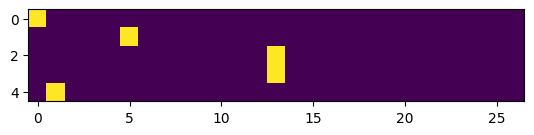

In [50]:
plt.imshow(xenc)

### Creating a neuron

In [51]:
W = torch.randn((27, 1)) # init weights
xenc @ W # Multiplyin i/p to weights    W.X + b  ---> b = 0 here

tensor([[1.5199],
        [0.1732],
        [0.8887],
        [0.8887],
        [0.4422]])

In [52]:
# 27 neurons
W = torch.randn((27, 27)) # init weights
xenc @ W # Multiplyin i/p to weights    W.X + b  ---> b = 0 here

tensor([[-1.7633e+00,  2.7952e-01,  6.3754e-01, -5.5096e-01,  7.4250e-01,
          4.3614e-01, -2.6282e-01, -1.6027e+00, -1.1521e+00, -6.6745e-01,
          2.6999e-02,  4.7796e-01, -1.3210e+00, -4.1086e-01,  1.8642e-02,
          3.1688e-01,  1.2543e+00, -1.4347e-03,  5.0476e-01,  7.8849e-01,
          5.8275e-01,  2.2012e+00, -4.9604e-01, -4.7392e-01,  1.2669e+00,
         -2.2346e-01,  5.8477e-01],
        [-1.4071e+00,  1.7768e+00,  4.6448e-01,  5.9070e-01, -1.3452e+00,
          9.1380e-01,  1.8974e-01, -1.1808e+00,  6.1188e-01,  1.6772e+00,
          8.7451e-01, -7.8343e-01, -1.0229e+00,  8.5305e-01,  1.5290e+00,
          5.8434e-01, -4.1423e-01, -4.6567e-01, -1.5662e+00,  2.6498e-01,
         -1.2061e+00,  4.0651e-01, -1.1982e+00, -9.3181e-01,  1.2111e+00,
         -3.1372e-01, -1.0284e+00],
        [ 3.8770e-01,  9.1475e-01,  9.6931e-01, -5.7775e-01,  5.4190e-01,
          7.3083e-01,  3.9592e+00, -4.1669e-01,  1.4527e-02, -1.9068e+00,
         -2.3399e-01, -8.4752e-01,  7.93

In [53]:
(xenc @ W)[3, 13]  # firing rate of 13th neuron looking at 3rd input

tensor(0.7639)

In [54]:
xenc[3], W[:,13] # 3rd input, 13th coloumn of 

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([-0.4109, -0.7574,  0.5331, -0.5045, -1.8575,  0.8531, -0.9780, -0.3687,
         -1.1240, -1.1839, -0.2525, -0.0947, -0.2547,  0.7639, -1.8526,  0.0161,
         -0.6705,  0.0136, -0.4195,  0.1836,  0.4362, -1.4437, -0.4503,  1.6099,
          0.4974, -0.6370, -1.4488]))

In [55]:
(xenc[3] * W[:, 13]).sum()

tensor(0.7639)

### Single Linear layer

In [56]:
logits = xenc @ W #log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
probs

tensor([[0.0041, 0.0315, 0.0451, 0.0137, 0.0501, 0.0369, 0.0183, 0.0048, 0.0075,
         0.0122, 0.0245, 0.0385, 0.0064, 0.0158, 0.0243, 0.0327, 0.0836, 0.0238,
         0.0395, 0.0525, 0.0427, 0.2155, 0.0145, 0.0148, 0.0847, 0.0191, 0.0428],
        [0.0057, 0.1383, 0.0372, 0.0422, 0.0061, 0.0584, 0.0283, 0.0072, 0.0432,
         0.1252, 0.0561, 0.0107, 0.0084, 0.0549, 0.1080, 0.0420, 0.0155, 0.0147,
         0.0049, 0.0305, 0.0070, 0.0351, 0.0071, 0.0092, 0.0786, 0.0171, 0.0084],
        [0.0177, 0.0299, 0.0316, 0.0067, 0.0206, 0.0249, 0.6289, 0.0079, 0.0122,
         0.0018, 0.0095, 0.0051, 0.0265, 0.0258, 0.0078, 0.0083, 0.0062, 0.0328,
         0.0046, 0.0193, 0.0028, 0.0399, 0.0013, 0.0020, 0.0035, 0.0044, 0.0179],
        [0.0177, 0.0299, 0.0316, 0.0067, 0.0206, 0.0249, 0.6289, 0.0079, 0.0122,
         0.0018, 0.0095, 0.0051, 0.0265, 0.0258, 0.0078, 0.0083, 0.0062, 0.0328,
         0.0046, 0.0193, 0.0028, 0.0399, 0.0013, 0.0020, 0.0035, 0.0044, 0.0179],
        [0.0167, 0.0717,

In [57]:
probs.shape # gives probability of next char if a single char was input. Highest one is chosen

torch.Size([5, 27])

In [58]:
# -------------SUMMARY -------------------------

In [59]:
xs

tensor([ 0,  5, 13, 13,  1])

In [60]:
ys

tensor([ 5, 13, 13,  1,  0])

In [61]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g)

In [62]:
xenc = F.one_hot(xs, num_classes = 27).float()  # Input to network
logits = xenc @ W #log-counts # predict log counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True) # probabilities for next char
probs


# Last3 lines are what we call softmax

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [63]:
nlls = torch.zeros(5)
for i in range(5):
      # i-th bigram:
      x = xs[i].item() # input character index
      y = ys[i].item() # label character index
      print('--------')
      print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
      print('input to the neural net:', x)
      print('output probabilities from the neural net:', probs[i])
      print('label (actual next character):', y)
      p = probs[i, y]
      print('probability assigned by the net to the the correct character:', p.item())
      logp = torch.log(p)
      print('log likelihood:', logp.item())
      nll = -logp
      print('negative log likelihood:', nll.item())
      nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

### So we selected this W and for that we are not getting very goof results. Eventually this W is the one we need to learn and tune. .. Enters GD

### Optimisation GD

In [64]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [65]:
# Randomly init 27 neuron's weights, each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

In [66]:
# Forward pass of NN Sinlge layer NN
xenc = F.one_hot(xs, num_classes = 27).float()  # Input to network
logits = xenc @ W #log-counts # predict log counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True) # probabilities for next char
loss = -probs[torch.arange(5), ys].log().mean() # probability assigned to actual char for the inputs

In [67]:
# # Calculate loss
# probs[0, 5],  probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]
print(loss.item())

3.7693049907684326


In [68]:
# Backward Pass
W.grad = None # set gradients to zero
loss.backward()

In [69]:
# Update the weights
W.data += -0.1 * W.grad

## Final Summary

In [70]:
# Creating the trainig set of all the biagrams (x, y)
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        #M[ix1, ix2] + = 1
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'Number of examples : {num}')

# Randomly init 27 neuron's weights, each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

Number of examples : 228522


In [84]:
# Gradient Descent
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4815571308135986


### We can see this loss is very near what we achieved with normal bigram modeling.

## Sampling from the model

In [76]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
